### Ejercicio 1
Crea al menos tres modelos de regresión distintos para intentar predecir lo mejor posible el retraso de los vuelos (ArrDelay) de DelayedFlights.csv.


### Ejercicio 4
Compara su rendimiento utilizando la aproximación traicionando/test o utilizando todos los datos (validación interna)


### Ejercicio 5
Realiza algún proceso de ingeniería de variables para mejorar su predicción

### Ejercicio 6
No utilices la variable DepDelay a la hora de hacer predicciones

In [152]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import pingouin as pg
from sklearn import metrics
import numpy as np 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [153]:
# Cargar los datos
filename = 'C:/Users/Lucía Alvarez/OneDrive - psico.edu.uy/00 Barcelona activa/DelayedFlights.csv'
df = pd.read_csv(filename, sep=",", encoding="utf8") 

Descripción de las variables: https://www.kaggle.com/code/adveros/flight-delay-eda-exploratory-data-analysis

In [154]:
# Estadísticos descriptivos de todo el dataframe
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [155]:
#Ver el nombre de todas las variables del dataframe
df.columns.values

array(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'], dtype=object)

A continuación, seleccioné tres variables que podrían predecir ArrDelay. Para esto, guarde las variables en un nuevo dataframe con el fin de evaluar sus correlaciones

In [156]:
df_describir= df.iloc[:, [15, 25, 26, 29]]
df_describir

,ArrDelay,CarrierDelay,WeatherDelay,LateAircraftDelay
0,-14.0,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN
2,14.0,NaN,NaN,NaN
3,34.0,2.0,0.0,32.0
4,11.0,NaN,NaN,NaN
...,...,...,...,...
1936753,25.0,3.0,0.0,22.0
1936754,75.0,0.0,57.0,0.0
1936755,99.0,1.0,0.0,79.0
1936756,9.0,NaN,NaN,NaN


In [157]:
#Eliminar los casos que tienen valores perdidos de las variables seleccionadas
df_describir.dropna(subset = ["ArrDelay","CarrierDelay","WeatherDelay", "LateAircraftDelay"], axis = 0, inplace = True)

corr_matrix = df_describir.corr(method='pearson')
corr_matrix


D:\servidor\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ArrDelay,CarrierDelay,WeatherDelay,LateAircraftDelay
ArrDelay,1.000000,0.501773,0.264624,0.478123
CarrierDelay,0.501773,1.000000,-0.068951,-0.178286
WeatherDelay,0.264624,-0.068951,1.000000,-0.054971
LateAircraftDelay,0.478123,-0.178286,-0.054971,1.000000


ArrDelay presenta una correlación positiva con CarrierDelay, WeatherDelay y LateAircraftDelay.
Las correlaciones oscilan entre .26 a .50.

In [158]:
#Caclcular VIF de las variables de interés
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

X = df_describir.iloc[:,:-1]

round(calc_vif(X),3)

,variables,VIF
0,ArrDelay,1.853
1,CarrierDelay,1.682
2,WeatherDelay,1.166


Los valores VIF están en el rango esperado.
Es importante recordar que un valor entre 1 y 5 indica una correlación moderada entre las variables del en el modelo.
Los VIF de las variables no presentan elevada multicolinealidad. Valores que no son lo suficientemente grave como para requerir atención.

##### Modelo de regresión 1: LateAircraftDelay 
LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.


In [159]:
#Descripción de la variable que va a predecir a ArrDelay
df.LateAircraftDelay.describe()

count    1.247488e+06
mean     2.529647e+01
std      4.205486e+01
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+00
75%      3.300000e+01
max      1.316000e+03
Name: LateAircraftDelay, dtype: float64

A continuación, se visualiza el diagrama de puntos de las variables a utilizar en el modelo de regresión.
Este diagrama tiene los datos puros (es decir, sin depurar)

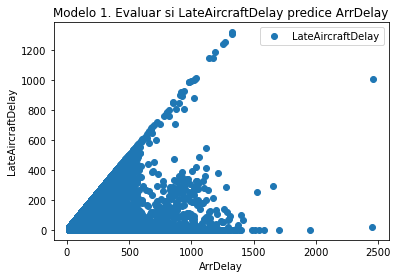

In [160]:
df.plot(x='ArrDelay', y='LateAircraftDelay', style='o')
plt.title('Modelo 1. Evaluar si LateAircraftDelay predice ArrDelay') 
plt.xlabel('ArrDelay') 
plt.ylabel('LateAircraftDelay') 
plt.show()

Para testear los diferentes modelos de regresión se van a guardar la variable predictora y la variable a predecir en dataframes separados. 

In [161]:
Regresion_1 = df.iloc[:, [15, 29]]

#Identificar valores perdidos
Regresion_1.isnull().sum()

ArrDelay               8387
LateAircraftDelay    689270
dtype: int64

In [162]:
Regresion_1.dropna(subset = ["ArrDelay", "LateAircraftDelay"], axis = 0, inplace = True)

Regresion_1.isnull().sum()


D:\servidor\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


ArrDelay             0
LateAircraftDelay    0
dtype: int64

In [163]:
#Estandarización de las variables de interés
scaler = StandardScaler()
x_test_numericas = scaler.fit_transform(Regresion_1)

Regresion_1 = pd.DataFrame(Regresion_1, columns=["ArrDelay", "LateAircraftDelay"])


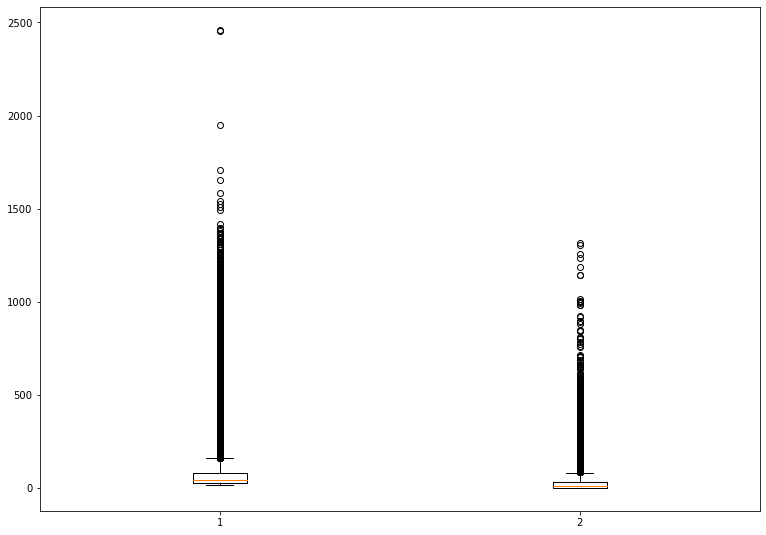

In [164]:
#Diagrama de caja de las variables transformadas
fig = plt.figure(figsize =(10, 7)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 
  
bp = ax.boxplot(Regresion_1) 
  
plt.show() 

In [165]:
#Eliminar outliers de las variables de interés
Q1 = Regresion_1.quantile (q = .25)
Q3 = Regresion_1.quantile (q = .75)
IQR = Regresion_1.apply (stats.iqr)

Regresion_1_depurada = Regresion_1 [~ ((Regresion_1 <(Q1-1.5 * IQR)) | (Regresion_1> (Q3 + 1.5 * IQR))). any (axis = 1)]

Regresion_1_depurada.isnull().sum()

ArrDelay             0
LateAircraftDelay    0
dtype: int64

In [166]:
#Evaluar las correlaciones entre las variables depuradas

display(pg.corr(Regresion_1_depurada['ArrDelay'], Regresion_1_depurada['LateAircraftDelay'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,1096957,0.199781,"[0.2, 0.2]",0.0,inf,1.0


Es importante recordar que la correlación entre ArrDelay y LateAircraftDelay eliminando los valores perdidos es de 0.478123.
Luego de estandarizar las variables, eliminar los outliers y los valores perdidos, se obtuvo una correlación de .20.
Observamos que la correlación entre las variables desciende, por lo cual, cabria preguntarse si fue correcto el procesamiento de datos entre las variables (hipotetizando que esperamos que las variables presentan una asociación positiva)


###### Modelo de regresión con LateAircraftDelay con los datos depurados (variables transformadas, sin outliers y valores perdidos)

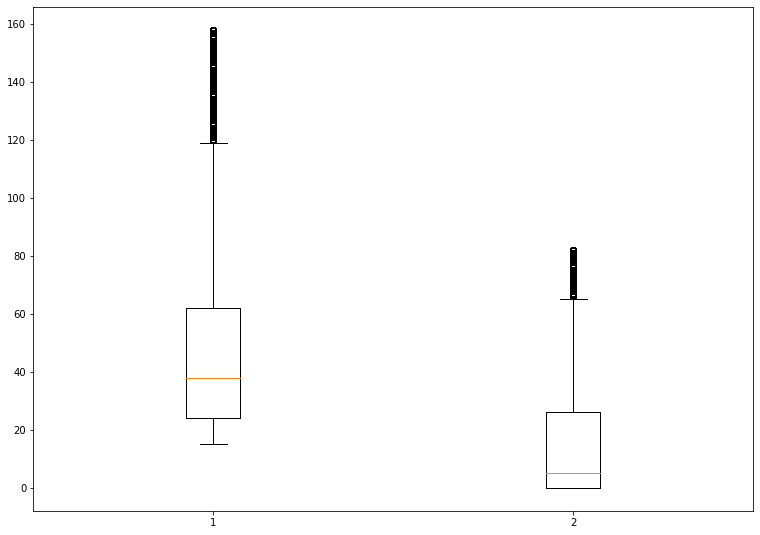

In [167]:
#Boxplot para ver cómo se comportan los datos
fig = plt.figure(figsize =(10, 7)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 
  
bp = ax.boxplot(Regresion_1_depurada) 
  
plt.show() 

In [168]:
X = Regresion_1_depurada['LateAircraftDelay'].values.reshape(-1,1)
y = Regresion_1_depurada['ArrDelay'].values.reshape(-1,1)

regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

#Para obtener el intercepto:
print(regressor.intercept_)

#Para obtener la pendiente
print(regressor.coef_)

[42.79207921]
[[0.29444715]]


A continuación, se observan los primeros 25 casos del dataframe y los valores que predice el modelo 

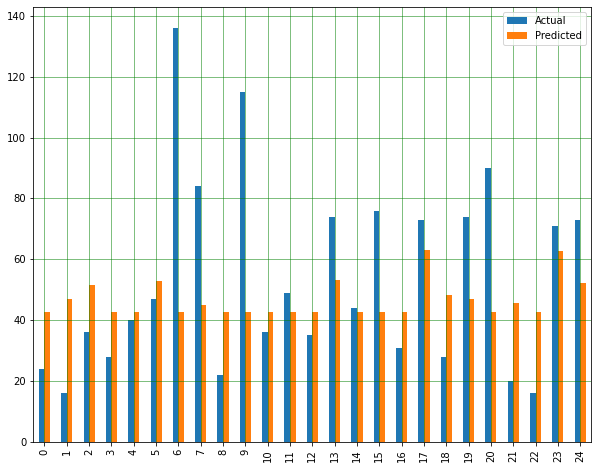

In [169]:
y_pred = regressor.predict(X_test)

df_depurado = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_depurado = df_depurado.head(25)

df_depurado.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##### A continuación, se va a evaluar el mismo modelo testeado previamente, pero unicamente con los datos transformados (sin sacar outliers)

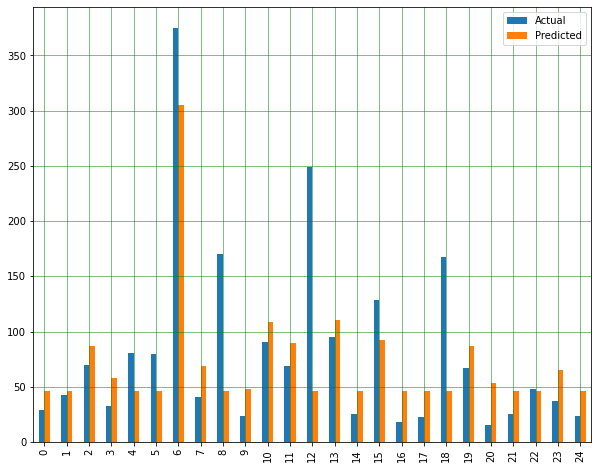

In [170]:
Xb = Regresion_1['LateAircraftDelay'].values.reshape(-1,1)
yb = Regresion_1['ArrDelay'].values.reshape(-1,1)

X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.2, random_state=0)

regressor = LinearRegression() 
regressor.fit(X_trainb, y_trainb) #Entrena el algoritmo 

y_predb = regressor.predict(X_testb)

df1_transformados = pd.DataFrame({'Actual': y_testb.flatten(), 'Predicted': y_predb.flatten()})
df1_transformados = df1_transformados.head(25)

df1_transformados.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [171]:
display(pg.corr(Regresion_1['ArrDelay'], Regresion_1['LateAircraftDelay'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,1247488,0.478123,"[0.48, 0.48]",0.0,inf,1.0


##### Modelo 2: WeatherDelay 

WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival

In [172]:
#Descripción de la variable que va a predecir a ArrDelay
df.WeatherDelay.describe()

count    1.247488e+06
mean     3.703571e+00
std      2.149290e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.352000e+03
Name: WeatherDelay, dtype: float64

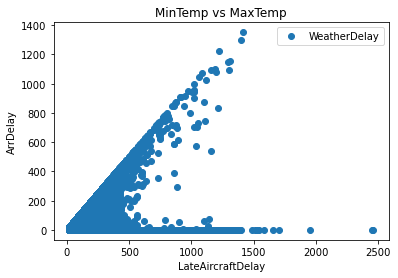

In [173]:
df.plot(x='ArrDelay', y='WeatherDelay', style='o')
plt.title('MinTemp vs MaxTemp') 
plt.xlabel('LateAircraftDelay') 
plt.ylabel('ArrDelay') 
plt.show()

In [174]:
Regresion_2= df.iloc[:, [15, 26]]

#Identificar valores perdidos
Regresion_2.isnull().sum()

ArrDelay          8387
WeatherDelay    689270
dtype: int64

In [175]:
Regresion_2.dropna(subset = ["ArrDelay", "WeatherDelay"], axis = 0, inplace = True)

Regresion_2.isnull().sum()

D:\servidor\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


ArrDelay        0
WeatherDelay    0
dtype: int64

In [176]:
#Estandarización de las variables de interés
scaler = StandardScaler()
x_test_numericas = scaler.fit_transform(Regresion_2)
Regresion_2_depurada = pd.DataFrame(Regresion_2, columns=["ArrDelay", "WeatherDelay"])

In [177]:
# ArrDelay lo que queremos predecir segun LateA..
X2 = Regresion_2_depurada['WeatherDelay'].values.reshape(-1,1)
y2 = Regresion_2_depurada['ArrDelay'].values.reshape(-1,1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)


regressor = LinearRegression() 
regressor.fit(X_train2, y_train2)

#Para obtener el intercepto:
print(regressor.intercept_)

#Para obtener la pendiente
print(regressor.coef_)

[60.55645828]
[[0.74848602]]


In [178]:
display(pg.corr(Regresion_2_depurada['ArrDelay'], Regresion_2_depurada['WeatherDelay'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,1247488,0.264624,"[0.26, 0.27]",0.0,inf,1.0


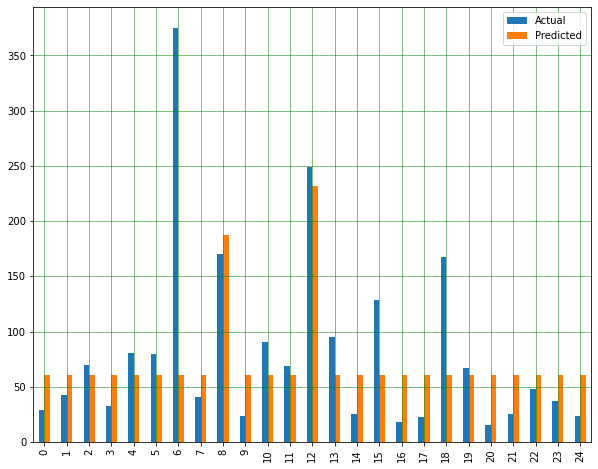

In [179]:
y_pred2 = regressor.predict(X_test2)

df_depurado2 = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
df_depurado2 = df_depurado2.head(25)
df_depurado2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##### Modelo 3: CarrierDelay 
CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

In [180]:
#Descripción de la variable que va a predecir a ArrDelay
df.CarrierDelay.describe()

count    1.247488e+06
mean     1.917940e+01
std      4.354621e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      2.100000e+01
max      2.436000e+03
Name: CarrierDelay, dtype: float64

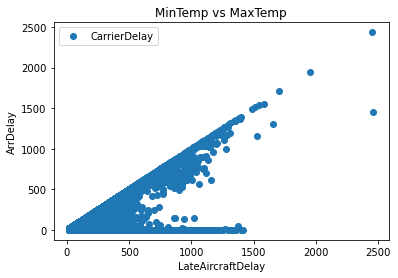

In [181]:
df.plot(x='ArrDelay', y='CarrierDelay', style='o')
plt.title('MinTemp vs MaxTemp') 
plt.xlabel('LateAircraftDelay') 
plt.ylabel('ArrDelay') 
plt.show()

In [182]:
Regresion_3= df.iloc[:, [15, 25]]

#Identificar valores perdidos
Regresion_3.isnull().sum()

ArrDelay          8387
CarrierDelay    689270
dtype: int64

In [183]:
Regresion_3.dropna(subset = ["ArrDelay", "CarrierDelay"], axis = 0, inplace = True)

Regresion_3.isnull().sum()

D:\servidor\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


ArrDelay        0
CarrierDelay    0
dtype: int64

In [184]:
#Estandarización de las variables de interés
scaler = StandardScaler()
x_test_numericas = scaler.fit_transform(Regresion_3)
Regresion_3_depurada = pd.DataFrame(Regresion_3, columns=["ArrDelay", "CarrierDelay"])


In [185]:
display(pg.corr(Regresion_3_depurada['ArrDelay'], Regresion_3_depurada['CarrierDelay'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,1247488,0.501773,"[0.5, 0.5]",0.0,inf,1.0


In [186]:
# ArrDelay lo que queremos predecir segun LateA..
X3 = Regresion_3_depurada['CarrierDelay'].values.reshape(-1,1)
y3 = Regresion_3_depurada['ArrDelay'].values.reshape(-1,1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0)

regressor = LinearRegression() 
regressor.fit(X_train3, y_train3)

#Para obtener el intercepto:
print(regressor.intercept_)

#Para obtener la pendiente
print(regressor.coef_)

[49.83432617]
[[0.70251205]]


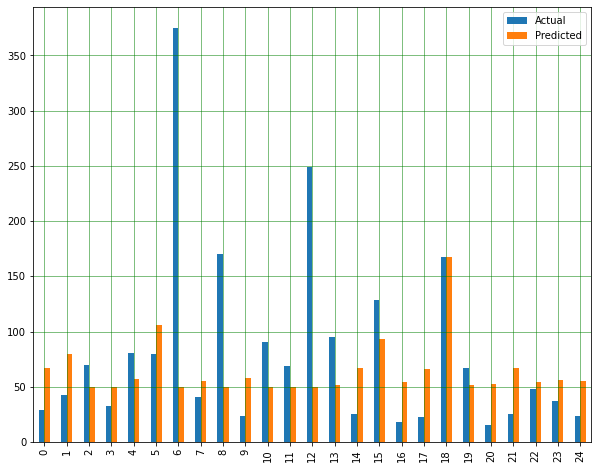

In [187]:
y_pred3 = regressor.predict(X_test3)
df_depurado3 = pd.DataFrame({'Actual': y_test3.flatten(), 'Predicted': y_pred3.flatten()})
df_depurado3 = df_depurado3.head(25)

df_depurado3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


###  Ejercicio 2
Compárales en base al MSE y al R2.

In [188]:
print('Modelo 1, con datos transformados, sin outlers y sin valores perdidos: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Modelo 1, con datos transformados, sin outlers y sin valores perdidos: 
Mean Absolute Error (MAE): 22.54967064971508
Mean Squared Error (MSE): 885.5733523346388
Root Mean Squared Error (RMSE): 29.758584514970444


In [189]:
print('Modelo 1, con datos transformados unicamente: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_testb, y_predb)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_testb, y_predb)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_testb, y_predb)))

Modelo 1, con datos transformados unicamente: 
Mean Absolute Error (MAE): 32.54120971683851
Mean Squared Error (MSE): 2794.893970875785
Root Mean Squared Error (RMSE): 52.866756765246954


In [190]:
print('Modelo 2, con datos transformados unicamente: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test2, y_pred2)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test2, y_pred2)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Modelo 2, con datos transformados unicamente: 
Mean Absolute Error (MAE): 38.6130660744094
Mean Squared Error (MSE): 3364.3115498354628
Root Mean Squared Error (RMSE): 58.00268571226218


In [191]:
print('Modelo 3, con datos transformados unicamente: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test3, y_pred3)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test3, y_pred3)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

Modelo 3, con datos transformados unicamente: 
Mean Absolute Error (MAE): 35.74823627491166
Mean Squared Error (MSE): 2751.5136898586247
Root Mean Squared Error (RMSE): 52.45487288954788


Al comparar los modelos se observa que el modelo El "Modelo 1, con datos transformados, sin outliers y sin valores perdidos" reporta:
- menor MAE en comparación al resto de los modelos. Esto sugiere que el modelo podría ser un predictor adecuado para los resultados. El aumento del tamaño de MAE indica que el modelo podría tener problemas en alguna área.
- menor MSE de todos los modelos. Esto indica que es el modelo con menor error asociado
- menor RMSE
En suma, se podría inferir que el modelo con los datos transformados, sin outliers y sin valores perdidos, es el que presenta mejores índices de ajustes. Esto remarca la importancia de realizar un adecuado procesamiento de los datos previo al análisis de los mismos.

### Enlaces utilizados

#### Identificar y eliminar outliers  con método de rango intercuartílico:
https://statologos.com/remove-outliers-python/


#### Ejercicio 1 y 2
  https://www.datasource.ai/es/data-science-articles/una-guia-para-principiantes-sobre-la-regresion-lineal-en-python-con-scikit-learn
  
#### Ejercicio 3
https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html#polynomial_regression_model_predictions